In [2]:
'''Import required dependencies'''
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns
import scipy.stats as st

# Dataset Overview:
## This project is about tree planting and maintenance in the city of Paris.
#### Trees are planted to provide green spaces in the city where residents and tourists can enjoy the outdoors, to clean the air of pollutants and improve rain water management. The city of Paris prides itself in the wooded heritage with more than 200,000 trees planted in the streets, green spaces and city facilities. With another 170,000 trees to be planted by 2026 making the city of Paris one of the most wooded cities in Europe. Being in the city, these trees require a different approach to maintenance compared to tree in the wild or designated forest lands. Because of the unique location, the city monitors tree development to replace dead ones and to ensure that newly planted ones are able to grow and be healthy.
##### For this project we will analyze data the city collects and maintains on the health and conditions of the trees. We will use Python, Jupyter NoteBook, and python libraries i.e. Pandas, Seasborn, matplotlib etc to analyze the data.
#### Following are the steps of the analysis.
1. Read in the data.
2. Clean the data.
3. Descriptive Statistics.
4. Graphical summaries.

In [3]:
'''Read in the data file'''
trees = 'p2-arbres-en.csv'
df = pd.read_csv(trees, sep=';', engine='python')

#total number of rows and columns
df.shape

(200137, 18)

In [4]:
# preview the first few records
df.head()

,id,location_type,domain,arrondissement,additional_address,street_number,street_location,id_location,tree_name,tree_type,tree_specie,variety,circumference_cm,height_m,development_stage,outstanding,geo_point_2d_a,geo_point_2d_b
0,99874,Tree,Garden,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Tree,Garden,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Tree,Garden,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Tree,Garden,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Tree,Garden,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


### Describe the data

The dataset has a total of 18 variables (columns), with a total of 200137 observations (rows).
There are 6 quantitative variables (numerical) and the rest are qualitative variables (objects).
Some of the variables have missing values of varying extent:
- domain 1, 
- additional_address 169,235, 
- street_number 200,137 (completely empty),
- tree_name 1,497,
- tree_type 16,
- tree_specie 1,752,
- variety 163,360,
- development_stage 67,205,
- outstanding 63,098

In [5]:
# description/ information on the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  200137 non-null  int64  
 1   location_type       200137 non-null  object 
 2   domain              200136 non-null  object 
 3   arrondissement      200137 non-null  object 
 4   additional_address  30902 non-null   object 
 5   street_number       0 non-null       float64
 6   street_location     200137 non-null  object 
 7   id_location         200137 non-null  object 
 8   tree_name           198640 non-null  object 
 9   tree_type           200121 non-null  object 
 10  tree_specie         198385 non-null  object 
 11  variety             36777 non-null   object 
 12  circumference_cm    200137 non-null  int64  
 13  height_m            200137 non-null  int64  
 14  development_stage   132932 non-null  object 
 15  outstanding         137039 non-nul

In [6]:
# count number of missing values
df.isna().sum()

id                         0
location_type              0
domain                     1
arrondissement             0
additional_address    169235
street_number         200137
street_location            0
id_location                0
tree_name               1497
tree_type                 16
tree_specie             1752
variety               163360
circumference_cm           0
height_m                   0
development_stage      67205
outstanding            63098
geo_point_2d_a             0
geo_point_2d_b             0
dtype: int64

### Statistical Summaries.
Descriptive statistics are only useful for the numerical variables and some of the variables cannot be summarized as it makes no sense for example id summaries are not relevant, the geo_points are location coordinates and street_number is an entirely empty column.
From the summaries we can deduce that:
- The minimum circumference is 0cm, maximum is 250,225cm (2.5km), the median is 70cm and mean is 83cm with a standard deviation of 673cm. These summaries indicate the data is skewed right with potential outliers (and most likely data entry errors).
- The minimun height is 0m, the maximum is 881,818m (882km), the median is 8m, and the mean height is 13m with a standard deviation of 1,971m. This suggests data is skewed right with potential outliers.
- The coordinates suggest the trees are located in the same region.

#### Orders of magnitude of column statistics
- The means for the various columns have the same eorders of magnitude (order=1), except for outstanding and street number that is null, id is of order 5.
- The standard deviations have differing orders of magnitude: 
   -  height is order 3, circumference is order 2, while geo_point_a&b are order -2, and id is order 5.
- The median just like the standard deviation has varying orders of magnitude:
   - height, geo_point_2d_b & outstanding are of order 0, circumference & geo_point_2d_a are of order 2, and id is order 5.
        

In [7]:
# Summary statistics of the numerical datatypes
df.describe().transpose().map("{:,.2f}".format)

,count,mean,std,min,25%,50%,75%,max
id,"200,137.00","387,202.68","545,603.24","99,874.00","155,927.00","221,078.00","274,102.00","2,024,745.00"
street_number,0.00,nan,nan,nan,nan,nan,nan,nan
circumference_cm,"200,137.00",83.38,673.19,0.00,30.00,70.00,115.00,"250,255.00"
height_m,"200,137.00",13.11,"1,971.22",0.00,5.00,8.00,12.00,"881,818.00"
outstanding,"137,039.00",0.00,0.04,0.00,0.00,0.00,0.00,1.00
geo_point_2d_a,"200,137.00",48.85,0.03,48.74,48.84,48.85,48.88,48.91
geo_point_2d_b,"200,137.00",2.35,0.05,2.21,2.31,2.35,2.39,2.47


# Method of Analysis:
Since some of the variables are completely empty/null and some have significant amount of missing values, the go to method would be to fill the missing values with a suitable method i.e mean, median or mode. In our analysis we will opt to drop all the columns that have significant amount of missing values and also to drop rows with missing values as the dataset will still be large enough to be considered reliable for the analysis.

In [8]:
# create a copy of the dataframe to preserve the original dataframe from changes
df_trees = df.copy()

The column 'street_number' is dropped as it is entirely empty and not enough discernible information could be obtained from the website to have a meaningful way to fill it.
The 'additional_address' and 'variety' variables are also dropped from analysis as they have a signicant amount of missing values. 

In [9]:
# Drop columns with missing values from the dataframe
df_trees = df_trees.drop(columns=['street_number','additional_address','variety'])
df_trees.count()

id                   200137
location_type        200137
domain               200136
arrondissement       200137
street_location      200137
id_location          200137
tree_name            198640
tree_type            200121
tree_specie          198385
circumference_cm     200137
height_m             200137
development_stage    132932
outstanding          137039
geo_point_2d_a       200137
geo_point_2d_b       200137
dtype: int64

All rows with null/missing values are also dropped from analysis to ensure a complete dataset with no missing values/nulls. This leaves a dataset with about 120,000 observations.

In [10]:
# drop all rows with missing values.
df_trees = df_trees.dropna(how='any')
df_trees.count()

id                   119001
location_type        119001
domain               119001
arrondissement       119001
street_location      119001
id_location          119001
tree_name            119001
tree_type            119001
tree_specie          119001
circumference_cm     119001
height_m             119001
development_stage    119001
outstanding          119001
geo_point_2d_a       119001
geo_point_2d_b       119001
dtype: int64

### Describe the dataset by Development Stage
Development stage is used to perform granular analysis, even though other fields (tree_specie, tree_type, tree_name) could have been used, development stage was selected because it had mageable number of categories.
Summary of observations:
- Number of trees
    - Young(J) 23,943
    - Young Adult (JA) 30,184
    - Adult(A) 59,221
    - Mature(M) 5,653
- Circumference: Mature trees have the largest (222cm) mean followed by adult, young adult and young have the smallest (70cm), the median follows the same trend. Adult have the largest (1,231cm) standard deviation, with mature and young about same and young adults the smallest (68cm). Adults have the largest (250,255cm) maximum, followed by young (9,035cm), young adult (7,540cm) and mature has the smallest (5,653cm).
This goes against the other measures and conventional wisdom, suggest outliers or data entry errors.
- Height: Young trees have the largest (43m) mean, followed by mature (19m), adult (13m) and young adult the smallest (10m). Young has the largest standard deviation (5,699m), followe by young adult (38m) and mature the smallest (7m). mature has the largest (20m) median, follwed by adult (12m) and young the smallest (5m). Young has the largest (881,818m) maximum, followed by young adult (5,155m), and mature the smallest (327m).
This suggests that the median measurement is the most appropriate as there are potential outliers in all categories with glaring ones in the young and young adult.
- Outstanding trees seem to be mature and are extremely rare.

In [11]:
# summary statistics by development stage
df_trees.groupby('development_stage', dropna=False).describe().transpose().map("{:,.2f}".format)

development_stage                  A             J            JA             M
id               count     59,221.00     23,943.00     30,184.00      5,653.00
                 mean     369,791.82    587,749.44    376,511.63    309,944.45
                 std      487,323.25    719,066.82    492,247.13    415,190.66
                 min       99,882.00     99,884.00    100,545.00    100,032.00
                 25%      194,904.00    209,976.50    210,826.50    150,373.00
                 50%      248,699.00    241,215.00    242,303.50    225,498.00
                 75%      279,745.00    294,872.50    278,605.00    268,130.00
                 max    2,023,308.00  2,023,252.00  2,023,255.00  2,023,015.00
circumference_cm count     59,221.00     23,943.00     30,184.00      5,653.00
                 mean         133.28         40.10         70.65        222.67
                 std        1,230.71         77.36         67.83         78.81
                 min            0.00          0.00          0.00          0.00
                 25%           90.00         25.00         50.00        190.00
                 50%          115.00         35.00         65.00        215.00
                 75%          150.00         50.00         85.00        245.00
                 max      250,255.00      9,035.00      7,540.00      2,439.00
height_m         count     59,221.00     23,943.00     30,184.00      5,653.00
                 mean          13.27         42.74         10.08         19.40
                 std           23.17      5,698.85         38.36          7.17
                 min            0.00          0.00          0.00          0.00
                 25%           10.00          5.00          6.00         16.00
                 50%           12.00          5.00          9.00         20.00
                 75%           15.00          6.00         10.00         22.00
                 max        2,525.00    881,818.00      5,155.00        327.00
outstanding      count     59,221.00     23,943.00     30,184.00      5,653.00
                 mean           0.00          0.00          0.00          0.02
                 std            0.03          0.01          0.01          0.15
                 min            0.00          0.00          0.00          0.00
                 25%            0.00          0.00          0.00          0.00
                 50%            0.00          0.00          0.00          0.00
                 75%            0.00          0.00          0.00          0.00
                 max            1.00          1.00          1.00          1.00
geo_point_2d_a   count     59,221.00     23,943.00     30,184.00      5,653.00
                 mean          48.86         48.85         48.85         48.86
                 std            0.02          0.02          0.02          0.04
                 min           48.76         48.76         48.76         48.76
                 25%           48.84         48.83         48.84         48.84
                 50%           48.86         48.85         48.85         48.86
                 75%           48.87         48.87         48.87         48.89
                 max           48.91         48.91         48.91         48.91
geo_point_2d_b   count     59,221.00     23,943.00     30,184.00      5,653.00
                 mean           2.34          2.35          2.35          2.35
                 std            0.05          0.05          0.05          0.05
                 min            2.21          2.21          2.21          2.21
                 25%            2.30          2.32          2.31          2.31
                 50%            2.35          2.35          2.35          2.35
                 75%            2.38          2.39          2.38          2.37
                 max            2.47          2.47          2.47          2.47

### Describe the dataset by Domain
Domain is used to perform granualr analysis, and just like the development stage it is selected because it has mageable number of categories.
Summary of observations:
- Number of trees
    - Alignment 83,412
    - Cemetary  11,576
    - DAC   18
    - DASCO 5,335
    - DASES 1
    - DFPE  1,045
    - DJS   1,939
    - Garden    14,873
    - RingRoad  802
- Most trees are in Alignment, Cemetery, and Garden.
- Tallest trees on are located in cemetery and shortest in DFPE as depicted by the median height.
- The largest trees are in DAC and slimmest in DFPE as depicted by the median circumference.

In [12]:
# Summary statistics by domain

df_trees.groupby('domain', dropna=False)[['height_m', 'circumference_cm']].describe().transpose().map("{:,.2f}".format)

domain                   Alignment   Cemetery     DAC      DASCO   DASES  \
height_m         count   83,412.00  11,576.00   18.00   5,335.00    1.00   
                 mean        21.96      12.35   10.22       9.41   18.00   
                 std      3,053.37       8.57    4.41      17.39     nan   
                 min          0.00       0.00    3.00       1.00   18.00   
                 25%          7.00       7.00    7.50       5.00   18.00   
                 50%         10.00      12.00   11.00       9.00   18.00   
                 75%         15.00      16.00   14.00      12.00   18.00   
                 max    881,818.00     510.00   16.00   1,211.00   18.00   
circumference_cm count   83,412.00  11,576.00   18.00   5,335.00    1.00   
                 mean       100.48     128.88  129.00      91.39  150.00   
                 std      1,037.18      69.32   50.50     259.76     nan   
                 min          0.00       0.00   50.00       0.00  150.00   
                 25%         55.00      74.00   91.25      45.00  150.00   
                 50%         80.00     122.00  125.00      83.00  150.00   
                 75%        120.00     178.00  150.00     125.00  150.00   
                 max    250,255.00   1,150.00  240.00  18,589.00  150.00   

domain                      DFPE       DJS     Garden RingRoad  
height_m         count  1,045.00  1,939.00  14,873.00   802.00  
                 mean       8.93     17.07       9.99     9.09  
                 std        5.65     23.50      16.11     4.86  
                 min        1.00      1.00       0.00     1.00  
                 25%        6.00      6.00       5.00     5.00  
                 50%        8.00      9.00       9.00     8.00  
                 75%       12.00     14.00      15.00    12.00  
                 max      118.00    120.00   1,510.00    25.00  
circumference_cm count  1,045.00  1,939.00  14,873.00   802.00  
                 mean      88.02     95.09     102.96    91.98  
                 std       60.17     69.88      84.99    53.24  
                 min        5.00      2.00       0.00    10.00  
                 25%       50.00     45.00      45.00    50.00  
                 50%       80.00     95.00      89.00    85.00  
                 75%      120.00    126.50     136.00   125.00  
                 max    1,130.00  1,230.00   2,439.00   430.00

### Describe the dataset by Arrondissement
Describing the trees by arrondissement, the following observations can be made.
Summary of observations:

In [13]:
# Summary statistics by arrondissement
df_trees.groupby('arrondissement')[['circumference_cm','height_m']
                                      ].agg(['count','mean','median','var',
                                             'std', 'sem', 'min', 'max']).map('{:,.2f}'.format).transpose()

arrondissement          BOIS DE BOULOGNE BOIS DE VINCENNES HAUTS-DE-SEINE  \
circumference_cm count          3,031.00          7,149.00         308.00   
                 mean              84.18            100.25         145.68   
                 median            68.00             90.00         150.00   
                 var            2,864.28          4,602.55       2,503.17   
                 std               53.52             67.84          50.03   
                 sem                0.97              0.80           2.85   
                 min                2.00              0.00           0.00   
                 max              784.00          1,200.00         287.00   
height_m         count          3,031.00          7,149.00         308.00   
                 mean              10.31            135.69           8.47   
                 median             9.00             10.00          10.00   
                 var               26.23    108,767,945.51          41.88   
                 std                5.12         10,429.19           6.47   
                 sem                0.09            123.35           0.37   
                 min                2.00              0.00           0.00   
                 max              105.00        881,818.00          20.00   

arrondissement          PARIS 10E ARRDT PARIS 11E ARRDT PARIS 12E ARRDT  \
circumference_cm count         2,284.00        4,115.00        7,491.00   
                 mean             98.56           87.63           96.89   
                 median           80.00           80.00           80.00   
                 var           4,595.52        2,052.46      140,117.58   
                 std              67.79           45.30          374.32   
                 sem               1.42            0.71            4.32   
                 min              10.00            0.00            0.00   
                 max           1,220.00          290.00       30,140.00   
height_m         count         2,284.00        4,115.00        7,491.00   
                 mean             11.88           12.43            9.95   
                 median           11.00           10.00           10.00   
                 var              35.87        6,460.11          320.65   
                 std               5.99           80.37           17.91   
                 sem               0.13            1.25            0.21   
                 min               2.00            0.00            0.00   
                 max             122.00        5,155.00        1,211.00   

arrondissement          PARIS 13E ARRDT PARIS 14E ARRDT PARIS 15E ARRDT  \
circumference_cm count         9,309.00        9,330.00        8,584.00   
                 mean             82.02          100.85           83.97   
                 median           75.00           90.00           75.00   
                 var           2,744.73        4,093.14        3,223.25   
                 std              52.39           63.98           56.77   
                 sem               0.54            0.66            0.61   
                 min               2.00            2.00            0.00   
                 max           1,160.00        1,230.00        2,750.00   
height_m         count         9,309.00        9,330.00        8,584.00   
                 mean             11.40            9.53            9.81   
                 median           10.00            8.00           10.00   
                 var             149.47           30.85          138.35   
                 std              12.23            5.55           11.76   
                 sem               0.13            0.06            0.13   
                 min               1.00            1.00            0.00   
                 max             204.00          155.00          810.00   

arrondissement          PARIS 16E ARRDT  ... PARIS 2E ARRDT PARIS 3E ARRDT  \
circumference_cm count         9,258.00  ...         466.00 

### Describe the dataset by Outstanding
Outstanding trees are either adult or mature with most of them in the mature catergory. The outstanding trees tend to be generally the tallest and widest.

In [14]:
# Summary statistics by outstanding
df_trees.groupby(['development_stage','outstanding'], dropna=False)[['height_m','circumference_cm']].describe().transpose().map("{:,.2f}".format)

development_stage                A                   J                JA  \
outstanding                    0.0     1.0         0.0    1.0        0.0   
height_m         count   59,167.00   54.00   23,942.00   1.00  30,183.00   
                 mean        13.27   15.43       42.75   6.00      10.08   
                 std         23.18    6.51    5,698.97    nan      38.36   
                 min          0.00    3.00        0.00   6.00       0.00   
                 25%         10.00   12.00        5.00   6.00       6.00   
                 50%         12.00   15.00        5.00   6.00       9.00   
                 75%         15.00   19.00        6.00   6.00      10.00   
                 max      2,525.00   32.00  881,818.00   6.00   5,155.00   
circumference_cm count   59,167.00   54.00   23,942.00   1.00  30,183.00   
                 mean       133.22  194.07       40.10  55.00      70.65   
                 std      1,231.27  111.58       77.36    nan      67.84   
                 min          0.00   30.00        0.00  55.00       0.00   
                 25%         90.00  125.25       25.00  55.00      50.00   
                 50%        115.00  167.50       35.00  55.00      65.00   
                 75%        150.00  220.75       50.00  55.00      85.00   
                 max    250,255.00  634.00    9,035.00  55.00   7,540.00   

development_stage                      M            
outstanding                1.0       0.0       1.0  
height_m         count    1.00  5,528.00    125.00  
                 mean    17.00     19.29     24.17  
                 std       nan      5.83     28.44  
                 min     17.00      0.00      3.00  
                 25%     17.00     16.00     16.00  
                 50%     17.00     20.00     23.00  
                 75%     17.00     22.00     27.00  
                 max     17.00    155.00    327.00  
circumference_cm count    1.00  5,528.00    125.00  
                 mean   131.00    219.62    357.41  
                 std       nan     69.02    228.19  
                 min    131.00      0.00     81.00  
                 25%    131.00    190.00    230.00  
                 50%    131.00    215.00    349.00  
                 75%    131.00    245.00    422.00  
                 max    131.00  2,210.00  2,439.00

In [15]:
# Summary of tree height and circumference by development stage
df_trees.groupby('development_stage')[['circumference_cm','height_m']
                                      ].agg(['count','min', 'max', 'mean','median','var',
                                             'std', 'sem']).map('{:,.2f}'.format).transpose()

development_stage                   A              J         JA         M
circumference_cm count      59,221.00      23,943.00  30,184.00  5,653.00
                 min             0.00           0.00       0.00      0.00
                 max       250,255.00       9,035.00   7,540.00  2,439.00
                 mean          133.28          40.10      70.65    222.67
                 median        115.00          35.00      65.00    215.00
                 var     1,514,651.54       5,984.82   4,601.56  6,210.71
                 std         1,230.71          77.36      67.83     78.81
                 sem             5.06           0.50       0.39      1.05
height_m         count      59,221.00      23,943.00  30,184.00  5,653.00
                 min             0.00           0.00       0.00      0.00
                 max         2,525.00     881,818.00   5,155.00    327.00
                 mean           13.27          42.74      10.08     19.40
                 median         12.00           5.00       9.00     20.00
                 var           536.68  32,476,892.32   1,471.77     51.47
                 std            23.17       5,698.85      38.36      7.17
                 sem             0.10          36.83       0.22      0.10

Looking at the tree heights, some measurements stand out. The maximum height for all development stages seem to be all errors that warrant investigation. For example there is a tree in the 'J' stage that is 881818m tall; that is over 800kms tall. The conventional wisdom would be that the height and circumference of the tree would be directly related to the development stage, young tree will have lower values and mature trees will have higher values.

## Graphical summaries
Bar graphs for development_stage, tree_type, tree_species and tree_name to give a feel of tree distribution.
Only development stage is used as the other variable have enormous amount of uniques values making bargraphs unreadable.
Bar graph of the count of trees in each development group. Majority of trees are in the adult group with mature having the least number of trees

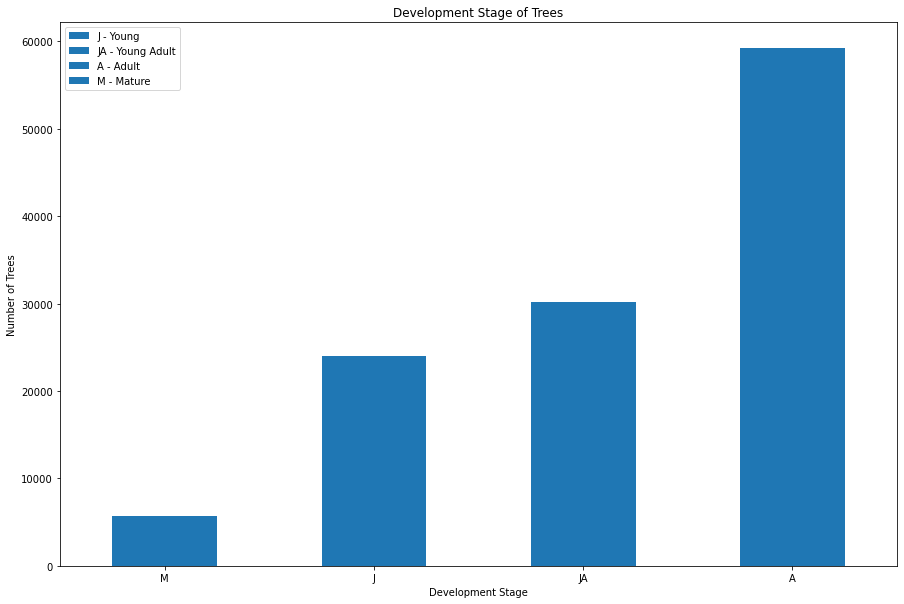

In [49]:
# Bar graph showing distrubution of tree counts by 'development_stage'
import matplotlib.patches as mpatches 
grp = df_trees.groupby(['development_stage'])
group = grp['id'].count().sort_values(ascending=True)
j = mpatches.Patch(label='J - Young') 
ja = mpatches.Patch(label='JA - Young Adult')
a = mpatches.Patch(label='A - Adult')
m = mpatches.Patch(label='M - Mature')
plt.rcParams["figure.figsize"] = (15,10)
tree_chart = group.plot(kind='bar', title ='Development Stage of Trees', label='grp')
plt.ylabel('Number of Trees')
plt.xlabel('Development Stage')
plt.legend(handles = [j, ja, a, m]) 
plt.xticks(rotation = 0)
plt.show()
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] # rest back to global params

Young trees on average are the tallest and young adult trees the shortest. This goes counter conventional wisdom, it is probably due to outliers in the young category.

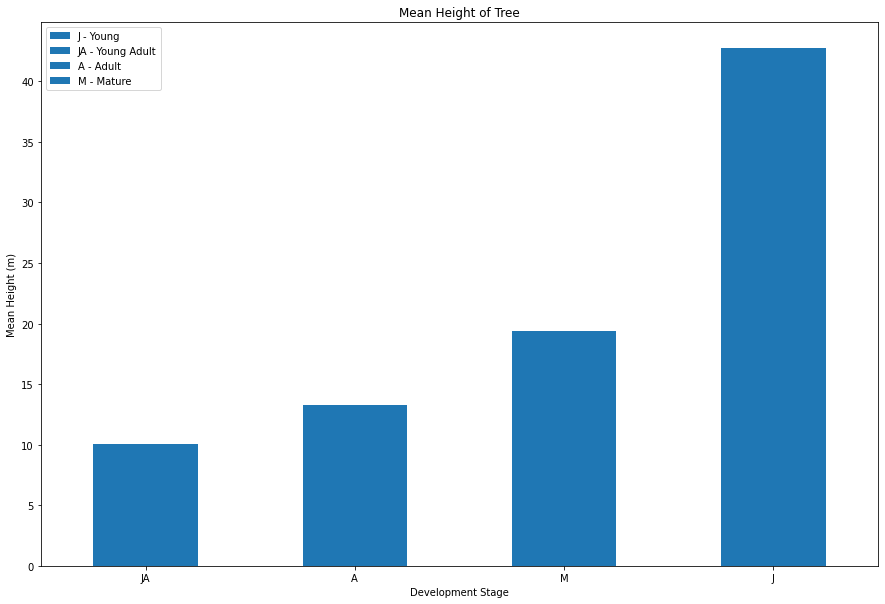

In [50]:
# Bar plot of average height of tree by delevolpment stage
avg_hght = grp['height_m'].mean().sort_values(ascending=True)
# plt.figure(figsize=(15,10), dpi=200)
avg_hght.plot(kind='bar', title='Mean Height of Tree')
plt.ylabel('Mean Height (m)')
plt.xlabel('Development Stage')
plt.legend(handles = [j, ja, a, m]) 
plt.xticks(rotation=0)
plt.show()

On average, mature trees have the largest circumference and young trees have the smallest circumference.

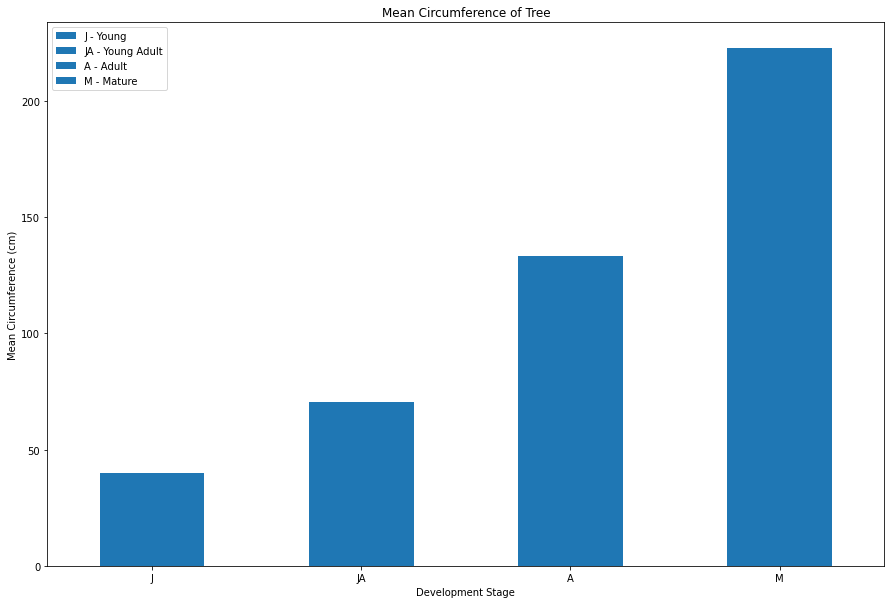

In [51]:
# Bar plot of average circumference of tree by delevolpment stage
avg_hght = grp['circumference_cm'].mean().sort_values(ascending=True)
avg_hght.plot(kind='bar', title='Mean Circumference of Tree')
plt.ylabel('Mean Circumference (cm)')
plt.xlabel('Development Stage')
plt.legend(handles = [j, ja, a, m]) 
plt.xticks(rotation=0)
plt.show()

About 50% of the trees are adult, 25% are young adult, 20% are young, and 5% are mature.

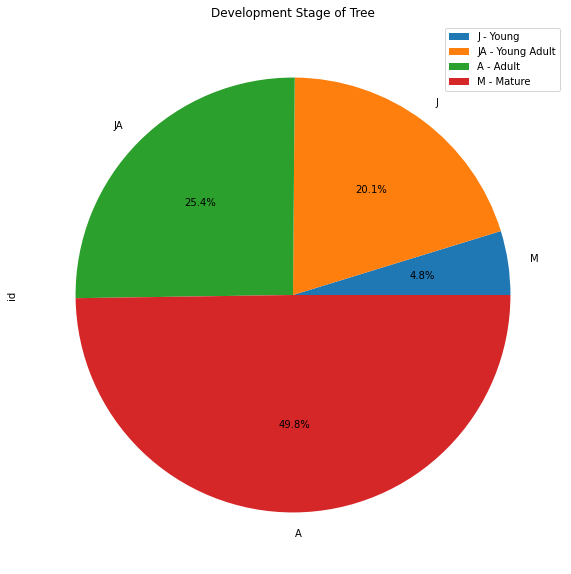

In [56]:
# Generate a pie plot showing the count distribution of tree for each development stage
pie_chart = group.plot(kind='pie', y = 'development_stage', title ='Development Stage of Tree', autopct='%1.1f%%')
plt.legend(['J - Young','JA - Young Adult','A - Adult','M - Mature']) 
plt.show()

Alignment has the most number of trees and DASES the least (1).

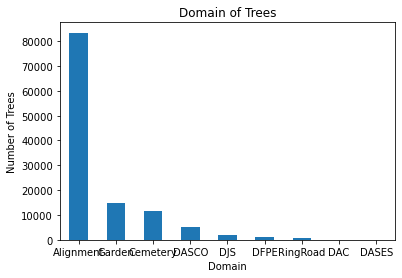

In [20]:
# Bar graph showing distrubution of tree counts by domain
grp = df_trees.groupby(['domain'])
group = grp['id'].count().sort_values(ascending=False)
tree_chart = group.plot(kind='bar', title ='Domain of Trees')
plt.ylabel('Number of Trees')
plt.xlabel('Domain')
plt.xticks(rotation = 0)
plt.show()

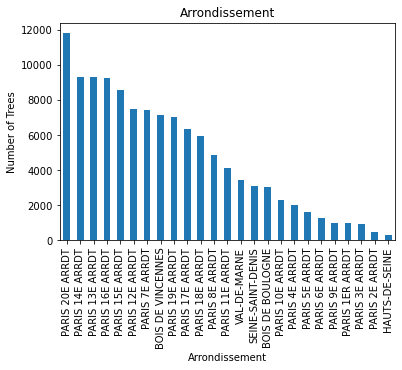

In [21]:
# Bar graph showing distrubution of tree counts by 'arrondissement'
grp = df_trees.groupby(['arrondissement'])
group = grp['id'].count().sort_values(ascending=False)
tree_chart = group.plot(kind='bar', title ='Arrondissement')
plt.ylabel('Number of Trees')
plt.xlabel('Arrondissement')
plt.xticks(rotation = 90)
plt.show()

Relationship between height and circumference seems weak between the difference development stages. Mature category seems to have a better defined relationship though like the other categories has multiple outliers

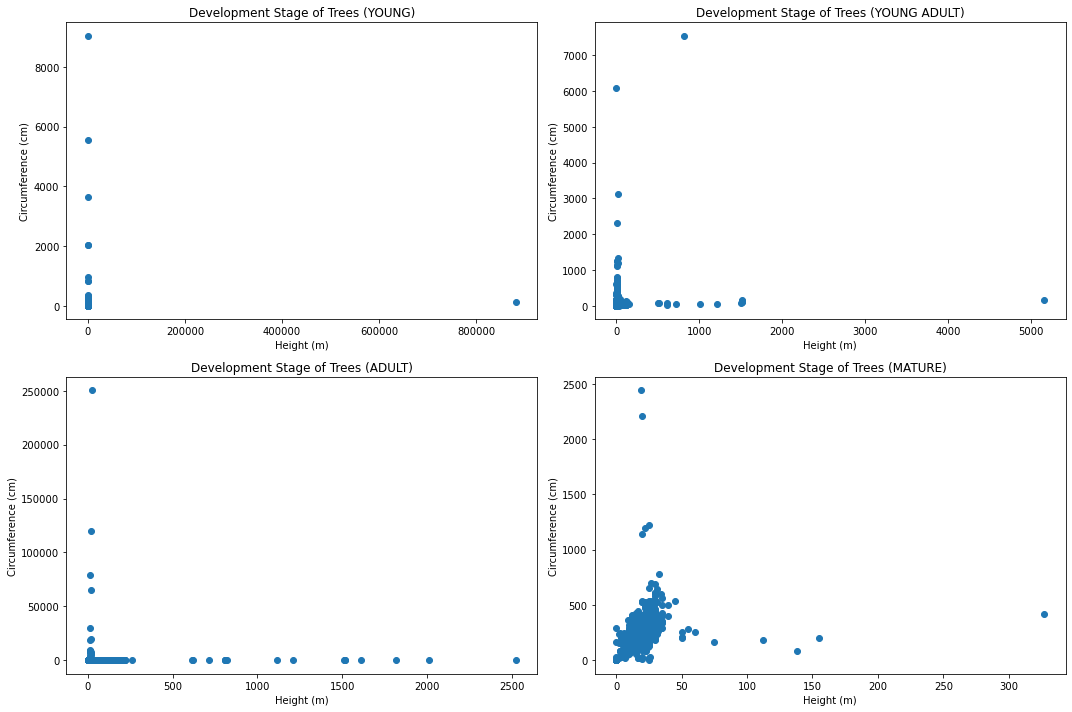

In [22]:
# Generate a scatterplot that shows correlation between height and circumference for each of the development stage.
A = df_trees.loc[df.development_stage =='A']
JA = df_trees.loc[df.development_stage =='JA']
J = df_trees.loc[df.development_stage =='J']
M = df_trees.loc[df.development_stage =='M']

fig, axes = plt.subplots(2, 2, figsize =(15, 10), tight_layout = True)
axes[0,0].scatter(x='height_m', y='circumference_cm', data=J)
axes[0,0].set_title('Development Stage of Trees (YOUNG)')

axes[0,1].scatter(x='height_m', y='circumference_cm', data=JA)
axes[0,1].set_title('Development Stage of Trees (YOUNG ADULT)')

axes[1,0].scatter(x='height_m', y='circumference_cm', data=A)
axes[1,0].set_title('Development Stage of Trees (ADULT)')

axes[1,1].scatter(x='height_m', y='circumference_cm', data=M)
axes[1,1].set_title('Development Stage of Trees (MATURE)')

for i in range(2):
    for j in range(2):
        axes[i,j].set_xlabel('Height (m)')
        axes[i,j].set_ylabel('Circumference (cm)')
plt.show()

Boxplot of height and circumference grouped by development stage shows that each stage for both variables have outliers and are all skewed right.

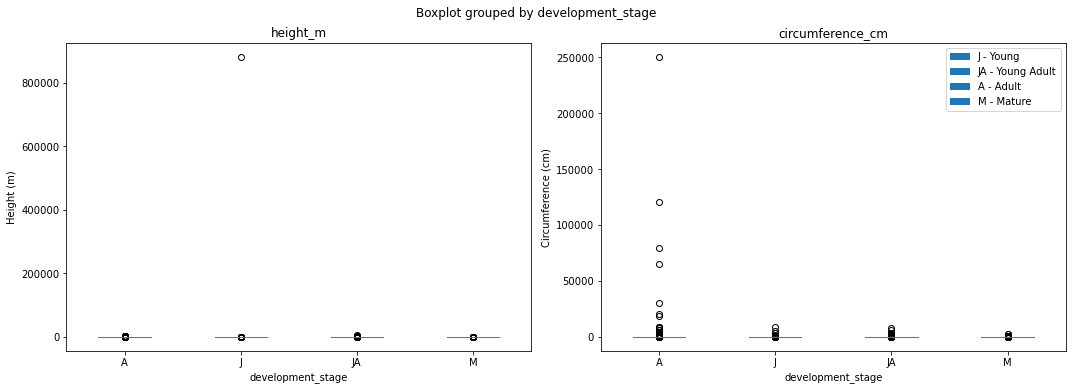

In [53]:
# Generate a box plot that shows the distrubution of circumfernce and height by the development stage.
fig, axb = plt.subplots(2, 2, figsize =(15, 10), tight_layout = True)
df_trees.boxplot(column='height_m', by ='development_stage', ax=axb[0,0], grid = False)
df_trees.boxplot(column='circumference_cm', by ='development_stage', ax=axb[0,1], grid = False)
fig.delaxes(axb[1,0]) # remove the empty subplot[1,0]
fig.delaxes(axb[1,1]) # remove the empty subplot[1,1]
plt.legend(handles = [j, ja, a, m]) 
axb[0,0].set_ylabel('Height (m)')
axb[0,1].set_ylabel('Circumference (cm)')
plt.show()

The histograms also tell the same story as the boxplots.

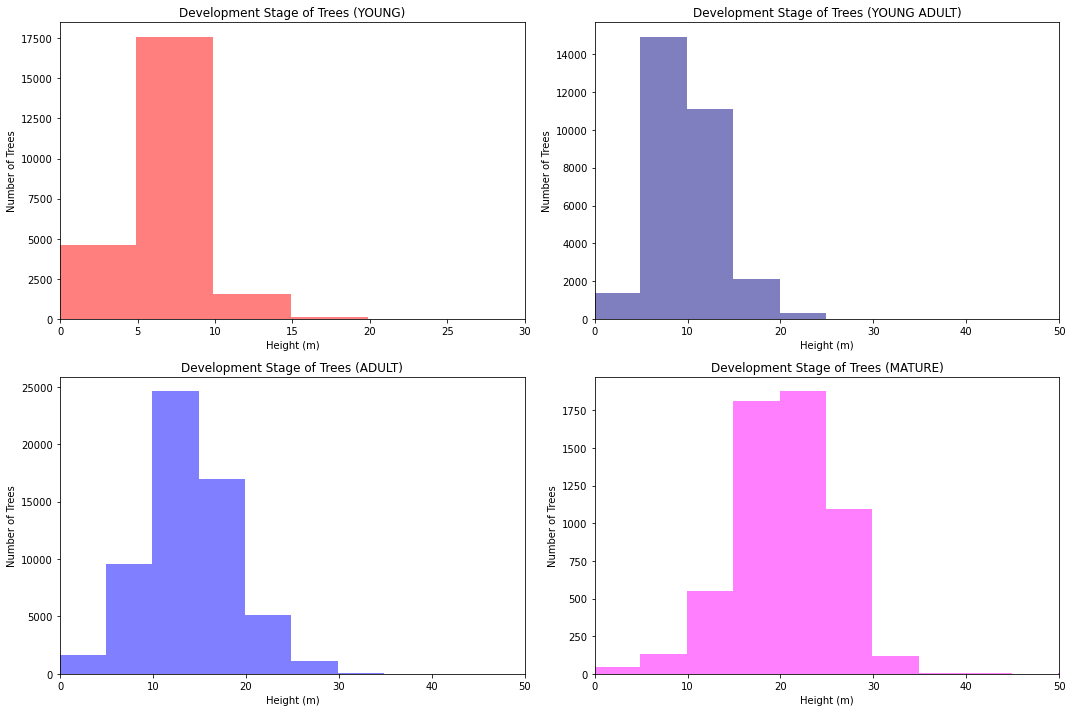

In [24]:
# Histograms of tree height by development stage.

n_bins = [0, 4.9, 9.9, 14.9, 19.9, 24.9, 29.9, 34.9, 39.9, 44.9, 49.9, 54.9,
          59.9, 64.9, 69.9, 74.9, 79.9, 84.9, 89.9, 94.9, 99.9, 104.9,1009.9]
fig, axs = plt.subplots(2, 2, figsize =(15, 10), tight_layout = True)
axs[0,0].hist(J['height_m'], bins= n_bins, alpha=0.5, color='red', label='J')
axs[0,0].set_title('Development Stage of Trees (YOUNG)')
axs[0,0].set(xlim=(0, 30)) # max is 881,800
axs[0,1].hist(JA['height_m'], bins= n_bins, alpha=0.5, color='navy', label='JA')
axs[0,1].set_title('Development Stage of Trees (YOUNG ADULT)')
axs[0,1].set(xlim=(0, 50)) #max is 5200
axs[1,0].hist(A['height_m'], bins= n_bins,alpha=0.5, color='blue', label='A')
axs[1,0].set_title('Development Stage of Trees (ADULT)')
axs[1,0].set(xlim=(0, 50)) #max is 2530
axs[1,1].hist(M['height_m'], bins= n_bins, alpha=0.5, color='magenta', label='M')
axs[1,1].set_title('Development Stage of Trees (MATURE)')
axs[1,1].set(xlim=(0, 50)) # max is 330
for i in range(2):
    for j in range(2):
        axs[i,j].set_xlabel('Height (m)')
        axs[i,j].set_ylabel('Number of Trees')
plt.show()

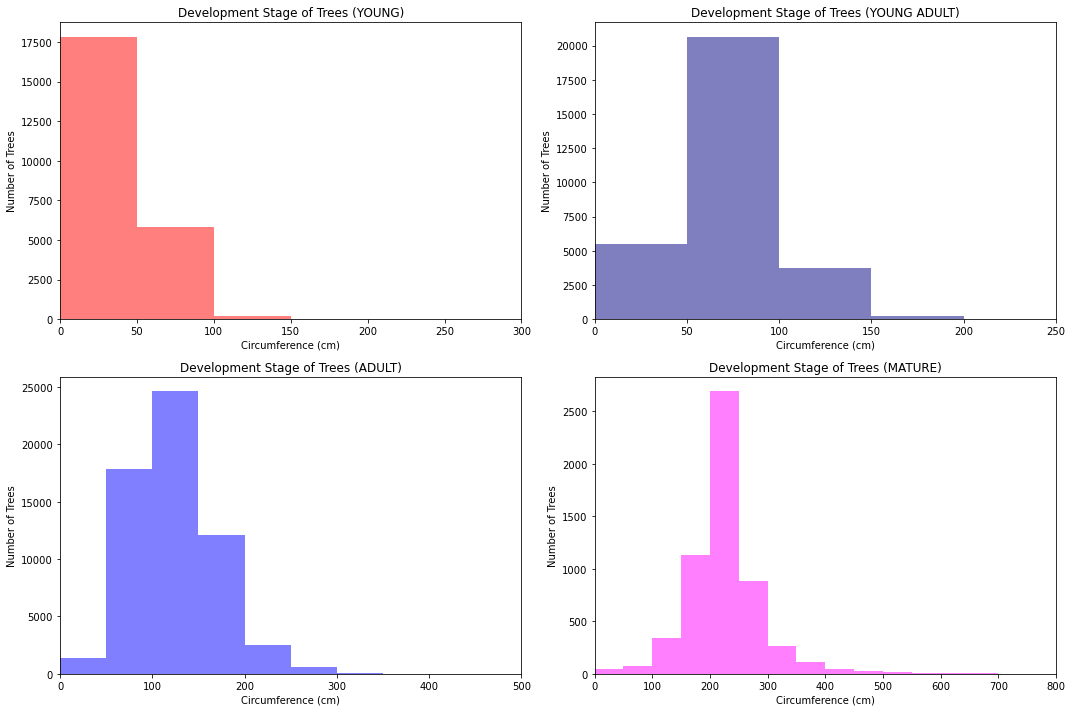

In [25]:
# Histogram of circumference by development stage

c_bin = [0, 49.9, 99.9, 149.9, 199.9, 249.9, 299.9, 349.9, 399.9, 449.9,
         499.9, 549.9, 599.9, 649.9, 699.9, 749.9, 799.9, 849.9, 899.9, 949.9, 999.9, 1099.9, 200000]
fig, axc = plt.subplots(2, 2, figsize =(15, 10), tight_layout = True)

axc[0,0].hist(J['circumference_cm'], bins= c_bin, alpha=0.5, color='red', label='J')
axc[0,0].set_title('Development Stage of Trees (YOUNG)')
axc[0,0].set(xlim=(0, 300)) # max is 9035
axc[0,1].hist(JA['circumference_cm'], bins= c_bin, alpha=0.5, color='navy', label='JA')
axc[0,1].set_title('Development Stage of Trees (YOUNG ADULT)')
axc[0,1].set(xlim=(0, 250)) #max is 7540
axc[1,0].hist(A['circumference_cm'], bins= c_bin, alpha=0.5, color='blue', label='A')
axc[1,0].set_title('Development Stage of Trees (ADULT)')
axc[1,0].set(xlim=(0, 500)) #max is 250255
axc[1,1].hist(M['circumference_cm'], bins= c_bin, alpha=0.5, color='magenta', label='M')
axc[1,1].set_title('Development Stage of Trees (MATURE)')
axc[1,1].set(xlim=(0, 800)) # max is 2439
for i in range(2):
    for j in range(2):
        axc[i,j].set_xlabel('Circumference (cm)')
        axc[i,j].set_ylabel('Number of Trees')
plt.show()


### Identify Potential Outliers
Since the dataset has values that look like potential outliers or data entry errors, we use the 1.5IQR method to identify these observations for the tree height and circumference and subset the dataset to contain only values that fall within the lower and upper bounds, then will run some descriptive statistics to see how the dataset compares to the original with the potential outliers.

Investigate outliers for the height variable

In [26]:
# Calculate quartiles and use to identify outliers for height

df_h = df_trees.groupby('development_stage')['height_m'].quantile([0.25, 0.75]).unstack().reset_index()
df_h.columns = ['development_stage', 'q1_h', 'q3_h']

# merge to original dataset
df_h = df_trees.merge(df_h, on='development_stage', how='left')

#compute the iqr
iqr_h = df_h['q3_h'] - df_h['q1_h']

# calculate the lower and upper bounds
ll_h = df_h['q1_h'] - 1.5*iqr_h
ul_h = df_h['q3_h'] + 1.5*iqr_h

Investigate outliers for the circumference variable

In [27]:
# Calculate quartiles and use to identify outliers for circumference

df_c = df_trees.groupby('development_stage')['circumference_cm'].quantile([0.25, 0.75]).unstack().reset_index()
df_c.columns = ['development_stage', 'q1_c', 'q3_c']

# merge to original dataset
df_c = df_trees.merge(df_c, on='development_stage', how='left')
#compute the iqr
iqr_c = df_c['q3_c'] - df_c['q1_c']
# calculate the lower and upper bounds
ll_c = df_c['q1_c'] - 1.5*iqr_c
ul_c = df_c['q3_c'] + 1.5*iqr_c

Merge the two datasets to have one final dateset. The values of the outliers columns are are: 1 possible outlier, 0 not outlier.

In [28]:
# Add outlier columns to the original dataset to help filter them out
df_trees['outlier_h'] =  np.where(~df_h['height_m'].between(ll_h,ul_h),1,0)
df_trees['outlier_c'] =  np.where(~df_c['circumference_cm'].between(ll_c,ul_c),1,0)

This dataset has the outliers filtered out, and some of the above analysis repeated to see to effect of the outliers.

In [29]:
# Filter out the potential outliers
df_com = df_trees[(df_trees['outlier_h']== 0) & (df_trees['outlier_c']== 0)]
df_com.shape

(107439, 17)

When outliers are removed, it can be noted that young trees are the smallest and mature the largest. With the means and medians tracking closely suggesting a more symmetric distribution.

In [30]:
df_com.groupby('development_stage')[['height_m','circumference_cm']].describe().transpose().map('{:,.0f}'.format)

development_stage            A       J      JA      M
height_m         count  55,907  17,358  28,999  5,175
                 mean       13       5       9     19
                 std         4       1       3      4
                 min         3       4       0      7
                 25%        10       5       6     16
                 50%        12       5       8     20
                 75%        15       6      10     22
                 max        22       7      16     31
circumference_cm count  55,907  17,358  28,999  5,175
                 mean      118      36      68    216
                 std        40      13      23     42
                 min         0       0       0    110
                 25%        90      25      50    195
                 50%       115      35      65    215
                 75%       145      45      80    240
                 max       240      85     137    327

The boxplots also suggest that the distributions are more symmetric as the median is located close to the center of each box with the whiskers being about equal lengths on either side of the box.

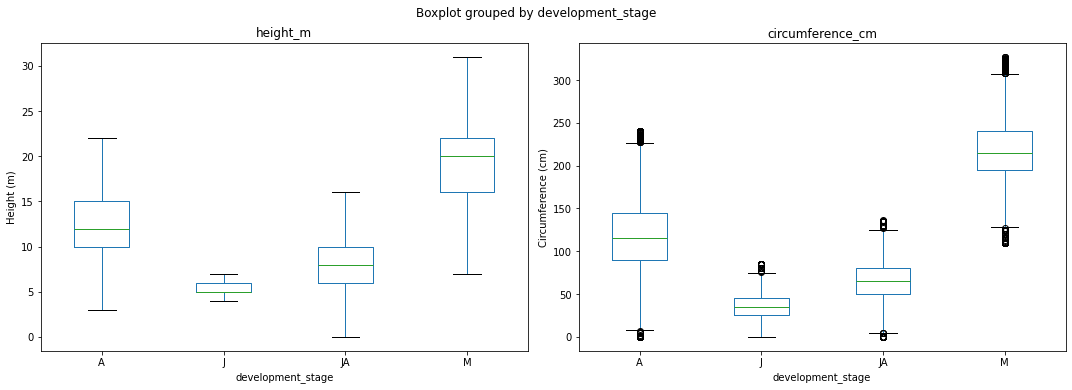

In [54]:
# Generate a box plot that shows the distrubution of circumfernce and height by the development stage.

fig, axb = plt.subplots(2, 2, figsize =(15, 10), tight_layout = True)
df_com.boxplot(column='height_m', by ='development_stage', ax=axb[0,0], grid = False)
df_com.boxplot(column='circumference_cm', by ='development_stage', ax=axb[0,1], grid = False)
plt.legend(handles = [j, ja, a, m]) 
fig.delaxes(axb[1,0]) # remove the empty subplot[1,0]
fig.delaxes(axb[1,1]) # remove the empty subplot[1,1]
axb[0,0].set_ylabel('Height (m)')
axb[0,1].set_ylabel('Circumference (cm)')
plt.show()

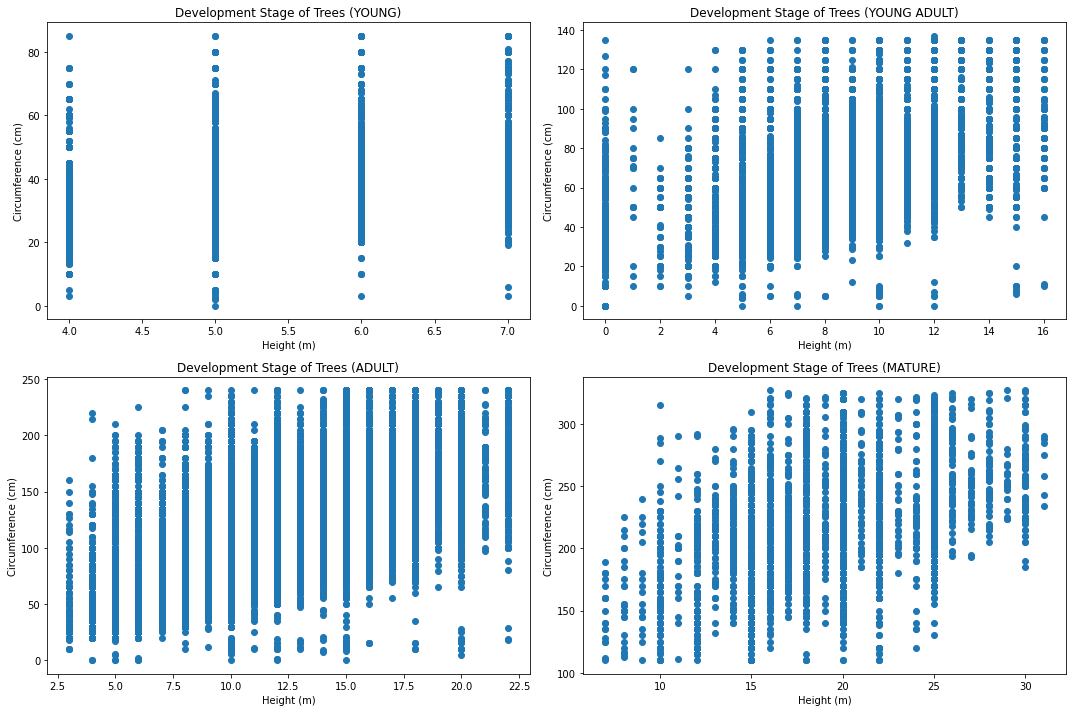

In [32]:
# Generate a scatterplot that shows correlation between height and circumference for each of the development stage.

fig, axes = plt.subplots(2, 2, figsize =(15, 10), tight_layout = True)

axes[0,0].scatter(x='height_m', y='circumference_cm', data=df_com.loc[df_com.development_stage =='J'])
axes[0,0].set_title('Development Stage of Trees (YOUNG)')
axes[0,1].scatter(x='height_m', y='circumference_cm', data=df_com.loc[df_com.development_stage =='JA'])
axes[0,1].set_title('Development Stage of Trees (YOUNG ADULT)')
axes[1,0].scatter(x='height_m', y='circumference_cm', data=df_com.loc[df_com.development_stage =='A'])
axes[1,0].set_title('Development Stage of Trees (ADULT)')
axes[1,1].scatter(x='height_m', y='circumference_cm', data=df_com.loc[df_com.development_stage =='M'])
axes[1,1].set_title('Development Stage of Trees (MATURE)')
for i in range(2):
    for j in range(2):
        axes[i,j].set_xlabel('Height (m)')
        axes[i,j].set_ylabel('Circumference (cm)')
plt.show()

# Summary of Analysis:
The original dataset consisted of about 200137 observations(rows) and a total of 18 variables. Dataset was cleaned to enable univeariate analysis to be done. Looking at some of the variables that could be anaylised, it is seen that the data is highly skewed right for height and circumference. The median height was 8m, with max of 881,818m, and the mean was 13m with standard deviation 1,971m. The maximum height highly skews the mean and it is most likely a data entry error. The median circumference was 70cm with max of 250,225cm, and the mean was 83cm with a standard deviation of 673cm. Here the stastics show a right skewed distribution with with the maximum most likely a data entry error.
Some of the variables that had significant amount of missing values were droped from the analysis, and of those that remained, all rows that had a missing value was dropped, this reduced the number of rows from 200k to 120k. Even though this is a significant number of observation that are dropped, the remaining observations were enough to be used in the analysis. Looking at the cordinates, the trees are located in the same region.


Development stage is used to group the data to perform granular analysis and a summary of key observations are:
-   Number of trees
    - Young(J) 23,943
    - Young Adult (JA) 30,184
    - Adult(A) 59,221
    - Mature(M) 5,653
-    About 50% of the trees are adult, 25% are young adult, 20% are young, and 5% are mature.
-   Mature trees had the largest circumference (223cm) on average followed by adult (133cm), young adult (70cm) and young had the smallest (70cm).
-   Mature trees also had largest median circumference (215cm) followed by adult (115cm), young adult (65cm), and young had the smallest (35cm).
-   Adult trees had the highest maximum circumference (250,225cm), follwoed by young (9,035cm), young adult (7,540cm) and mature had the smallest max (2,439cm). This goes against the other measures and conventional wisdom, suggesting outliers or data entry errors.
-   Young trees are the tallests on avergae (43m), followed by mature (19m), adult (13m) and young adult the shortest (10m).  
-   Mature trees are the tallest by median (20m), followed by adult (12m) and young the shortest (5m). 
-   Young trees have the highest maximum (881,818m), followed by young adult (5,155m), and mature the lowest (327m). This suggests the median measurement is the most appropriate as there are potential outliers in all categories with glaring ones in the young and young adult.
- Outstanding trees seem to be mature and are extremely rare.

When Domain is used to perform granualr analysis, some oustanding observations can be made.
- Number of trees
    - Alignment 83,412
    - Cemetary  11,576
    - DAC   18
    - DASCO 5,335
    - DASES 1
    - DFPE  1,045
    - DJS   1,939
    - Garden    14,873
    - RingRoad  802
- Most trees are in Alignment, Cemetery, and Garden. Alignment has the most number of trees and DASES the least (1).
- Tallest trees are located in cemetery and shortest in DFPE as depicted by the median height (12m vs 8m).
- The largest trees are in DAC and slimmest in DFPE as depicted by the median circumference (150cm vs 80cm).


-   When Outstanding is used to describe the dataset, it can be noted that: Outstanding trees are either adult or mature with most of them in the mature catergory. The outstanding trees tend to be generally the tallest and widest.

-   Looking at the tree heights, some measurements stand out. The maximum height for all development stages seem to be all errors that warrant investigation. For example there is a tree in the 'J' stage that is 881818m tall; that is over 800kms tall. The conventional wisdom would be that the height and circumference of the tree would be directly related to the development stage, young tree will have lower values and mature trees will have higher values. We can conclude that most trees are in the adult stage and mature has the smallest nu,mber of trees, we can speculate that when a tree matures it dies or cut down because of safety risks.


Relationship between height and circumference seems weak between the difference development stages. Mature category seems to have a better defined relationship though like the other categories has multiple outliers
Boxplot of height and circumference grouped by development stage shows that each stage for both variables have outliers and are all skewed right.
The histograms also tell the same story as the boxplots.

### Identify Potential Outliers
Since the dataset has values that look like potential outliers or data entry errors, we use the 1.5IQR method to identify these observations for height and circumference. When values identified as potential outliers are excluded from analysis, it can be noted that young trees are the smallest (both in circumference and height) and mature the tallest/largest. With the means and medians tracking closely between the development stages suggesting a more symmetric distribution.
The boxplots also suggest that the distributions are more symmetric as the median is located close to the center of the box with whiskers that are equal lengths on either side of the box.
